In [25]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

os.chdir('../')
from Funciones.funciones import metrics
os.chdir('./Modelos')

In [4]:
fh5=open('..\Datos\df_PCA10k_train_test.pkl','rb')
train_test=pickle.load(fh5)
fh5.close()


X = train_test['X']
y = train_test['y']

print('X:',X.shape,'y:',y.shape)

X: (54484, 10113) y: (54484, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y
print('X_train_smote:',X_train_smote.shape,'y_train_smote:',y_train_smote.shape)
print('X_test:',X_test.shape,'y_test:',y_test.shape)

X_train_smote: (42273, 10113) y_train_smote: (42273, 1)
X_test: (17980, 10113) y_test: (17980, 1)


In [19]:
fh4 = open('m_reglog_PCA_final.pkl','rb')
logreg_model = pickle.load(fh4)
fh4.close()

In [20]:
fh5 = open('m_XGBoost_PCA_vfinal.pkl','rb')
xgb_model = pickle.load(fh5)
fh5.close()

In [21]:
estimators = [ # ddos modelos distintos, un random forest y un SVC con escalado previo
        ('reglog', logreg_model),
    ('xgb', xgb_model)
     # aqui mete como modelo un pipeline con un standard scaler y un SVC
]

In [22]:
stack = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
) 

In [23]:
stack.fit(X_train_smote, y_train_smote)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 

StackingClassifier(estimators=[('reglog',
                                LogisticRegression(max_iter=500,
                                                   multi_class='ovr',
                                                   verbose=1)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                              

In [28]:
fh = open('m_stacking_PCA.pkl','wb') #guardamos modelo en archivo pickle
pickle.dump(stack,fh)
fh.close()

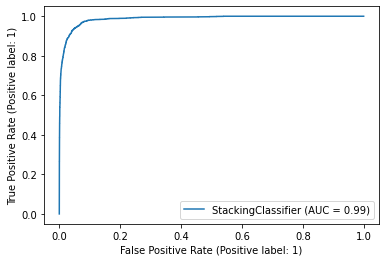

Train AUC 0.9995939622163764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32518
           1       0.99      0.99      0.99      9755

    accuracy                           0.99     42273
   macro avg       0.99      0.99      0.99     42273
weighted avg       0.99      0.99      0.99     42273



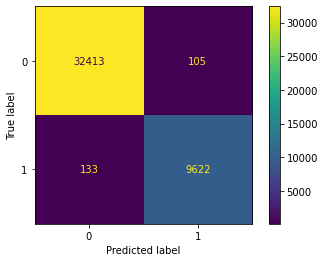

Test AUC 0.987027881105656
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16016
           1       0.88      0.81      0.84      1964

    accuracy                           0.97     17980
   macro avg       0.93      0.90      0.91     17980
weighted avg       0.97      0.97      0.97     17980



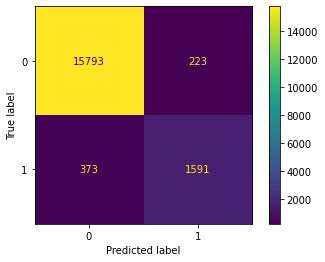

In [26]:
metrics(stack, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)